### Exploratory Data Analysis on Covid-19

**Introduction:**
The COVID-19 pandemic has affected millions of people worldwide and has been a major public health concern since its outbreak. In this project, we aim to analyze the COVID-19 dataset provided by WHO to gain insights into the spread of the disease across different regions and countries. The dataset contains information on the number of confirmed cases, deaths, and recoveries, as well as the date and country/region of reporting.

**Methodology:**
We followed the CRISP-DM (Cross Industry Standard Process for Data Mining) framework, which involves the following steps: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. Our focus in this project was on the Data Understanding, Data Preparation, and Modeling phases.

**Data Understanding:**
We started by exploring the dataset to gain an understanding of its contents and structure. This involved performing univariate and bivariate analysis to examine the distributions and relationships of the variables. We also conducted exploratory data analysis (EDA) to identify trends and patterns in the data.

**Data Preparation:**
After understanding the data, we cleaned and prepared it for analysis. We also transformed and normalized the data as needed to prepare it for modeling.

**Modeling:**
We used statistical analysis techniques such as ANOVA and Tukey HSD to identify the relationship between the continent and the number of confirmed cases. We also performed other analysis to gain insights into the data and its patterns.

**Results:**
Our analysis revealed significant differences in the number of confirmed cases across different continents. Specifically, we found that the number of confirmed cases was highest in Europe and the Americas. These findings provide valuable insights into the spread of COVID-19 and can help inform public health policies and interventions. Further analysis using Tukey HSD test showed that there were statistically significant differences in the number of confirmed cases between certain pairs of continents, but not for others. Specifically, the pairs of Africa and Western Pacific, Eastern Mediterranean and South-East Asia, Eastern Mediterranean and Americas, and Americas and South-East Asia did not show statistically significant differences. These findings suggest that the continent may play a role in the spread and transmission of COVID-19.

**Conclusion:**
In conclusion, our project demonstrates the value of data science in providing insights into complex problems such as the COVID-19 pandemic. By following the CRISP-DM framework and performing rigorous analysis, we were able to identify important patterns and relationships in the data. Our results have practical implications for public health practitioners and policymakers working to control the spread of the disease.






#### Importing Libraries

In [1]:
#importing libaraies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#top 5 rows of the data
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


### Exploratory Data Analysis

In [4]:
#concise summary of the data 
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
#descriptive statistics of the numerical variables 
covid_data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [6]:
#descriptive statistics of the categorical variables 
covid_data.describe(include = 'object')

,Province/State,Country/Region,Date,WHO Region
count,14664,49068,49068,49068
unique,78,187,188,6
top,Australian Capital Territory,China,1/22/2020,Europe
freq,188,6204,261,15040


In [7]:
#checking for the count of missiong values in each of the columns 
covid_data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

having a look at the concise info from the data, there is a need to change the data types of certain columns as well as drop some irrelevant colunmns. 

In [8]:
#converting the date column to the correct data type 
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
# dropping the 'Province' column
covid_data.drop(columns = 'Province/State', inplace = True)

In [9]:
covid_data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
#extracting the months fom the date column
covid_data['Month'] = covid_data['Date'].dt.month_name()

In [11]:
#total number of confirmed cases recorded as at 2020-07-27
cases = covid_data['Confirmed'].sum()
cases

828508482

In [12]:
#total number of confirmed deaths recorded as at 2020-07-27
deaths = covid_data['Deaths'].sum()
deaths

43384903

In [13]:
#total number of recoviries as at 2020-07-27
recovered = covid_data['Recovered'].sum()
recovered

388408229

In [14]:
#active cases as at 2020-07-27
active = covid_data['Active'].sum()
active

396715350

In [15]:
#percentage of deaths
death_percentage=deaths/cases*100
death_percentage

5.23650680018023

In [16]:
#percentage of recoveries
recovered_percentage=recovered/cases*100
recovered_percentage

46.88041672939686

In [17]:
#percentage of active cases
active_percentage=active/cases*100
active_percentage

47.88307647042291

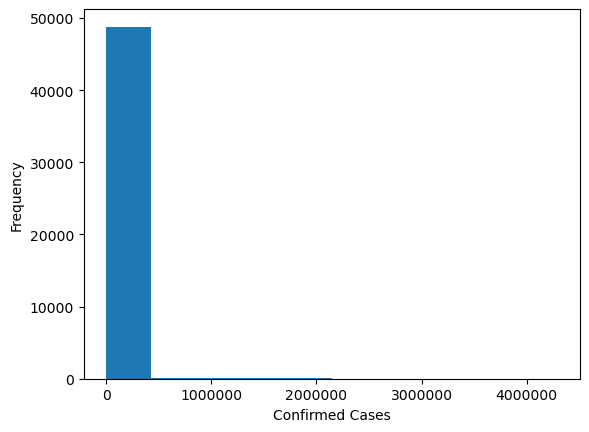

In [18]:
# distribution of confirmed cases
plt.hist(covid_data['Confirmed'])
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()


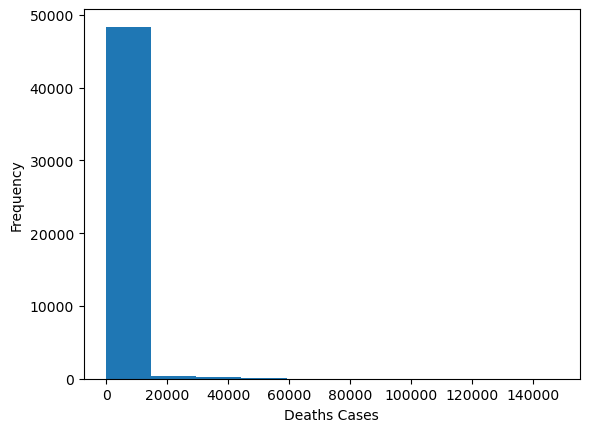

In [19]:
# distribution of death cases
plt.hist(covid_data['Deaths'])
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Deaths Cases')
plt.ylabel('Frequency')
plt.show()


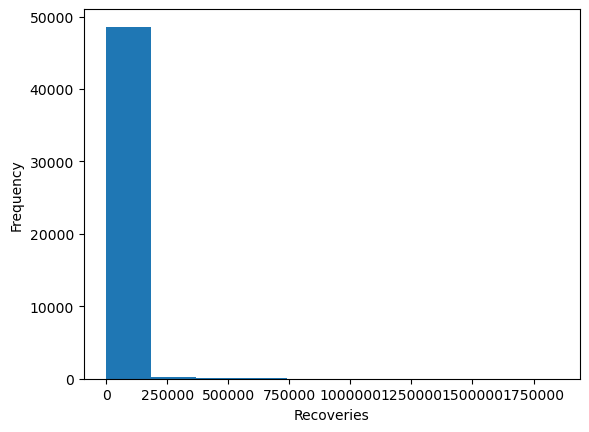

In [20]:
# distribution of death cases
plt.hist(covid_data['Recovered'])
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Recoveries')
plt.ylabel('Frequency')
plt.show()

#### Trend of Confirmed Cases Overtime

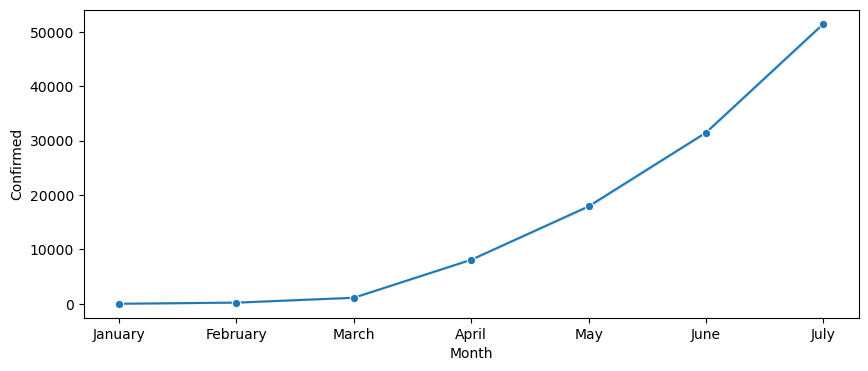

In [21]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Month', y='Confirmed', data=covid_data, marker='o', ci=False)
plt.show()


#### Countries With the Highest Number of Covid Cases 


In [22]:
#top 10 countries with the higest number of recorded cases 
covid_data.groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False,).head(10)


Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

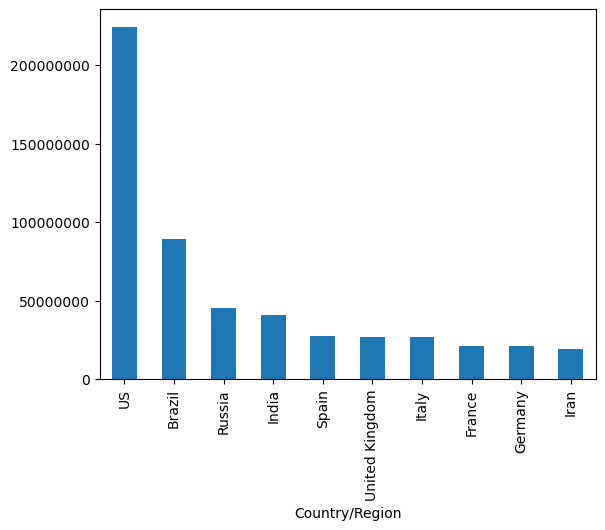

In [23]:
#top 10 countries with the higest number of recorded cases 
covid_data.groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending = False,).head(10).plot.bar()
plt.ticklabel_format(style='plain', axis='y')


#### Countries With the Highest Number of Covid Death Cases 


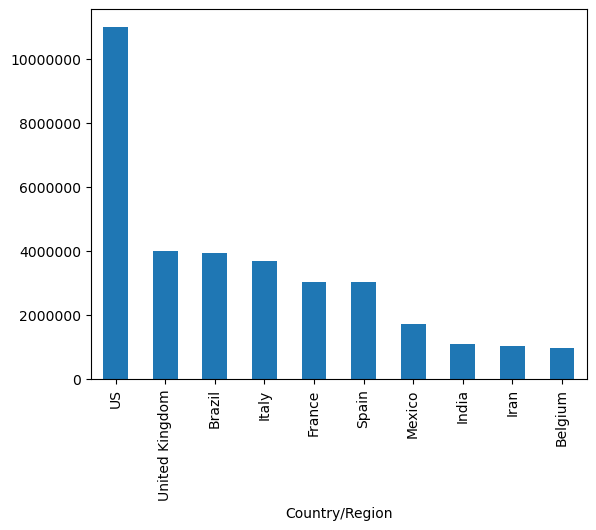

In [24]:
#top 10 countries with the higest number of recorded cases 
covid_data.groupby(['Country/Region'])['Deaths'].sum().sort_values(ascending = False,).head(10).plot.bar()
plt.ticklabel_format(style='plain', axis='y')


#### Comparing Countries With Respect to Confirmed Cases, Recoveries and Deaths

In [25]:
#graph of countries with the higest number of recorded cases 
covid_data.groupby(['Country/Region'])['Confirmed', 'Recovered', 'Deaths'].sum().sort_values(ascending = False,
                                                            by = 'Confirmed').head(10)

,Confirmed,Recovered,Deaths
Country/Region,,,
US,224345948,56353416,11011411
Brazil,89524967,54492873,3938034
Russia,45408411,25120448,619385
India,40883464,23783720,1111831
Spain,27404045,15093583,3033030
United Kingdom,26748587,126217,3997775
Italy,26745145,15673910,3707717
France,21210926,7182115,3048524
Germany,21059152,17107839,871322


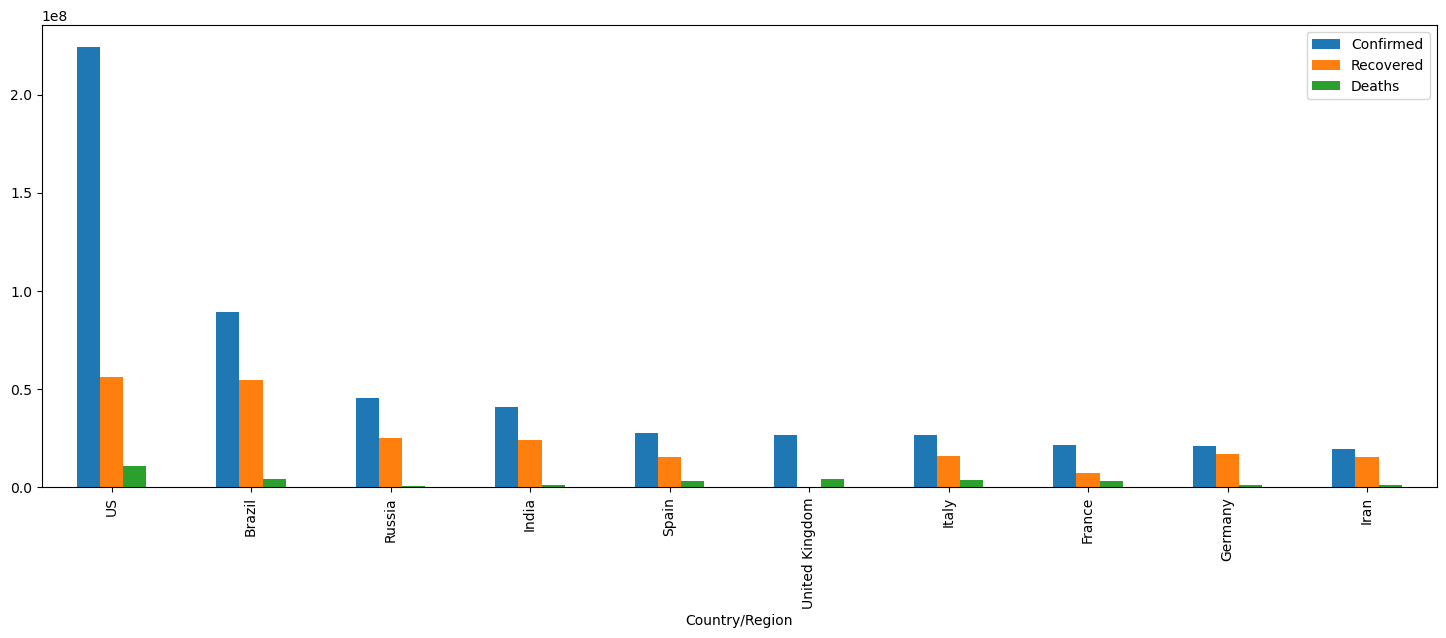

In [26]:
#graph of countries with the higest number of recorded cases 
covid_data.groupby(['Country/Region'])['Confirmed', 'Recovered', 'Deaths'].sum().sort_values(ascending = False,
                                                    by = 'Confirmed').head(10).plot.bar(figsize = (18, 6));

#### Comparing Continents With Respect to Confirmed Cases, Recoveries and Deaths

In [27]:
#continent with the higest number of recorded cases 
covid_data.groupby(['WHO Region'])['Confirmed', 'Recovered', 'Deaths'].sum().sort_values(ascending = False,
                                                            by = 'Confirmed')


,Confirmed,Recovered,Deaths
WHO Region,,,
Americas,402261194,157069444,19359292
Europe,248879793,123202075,19271040
Eastern Mediterranean,74082892,48050703,1924029
South-East Asia,55118365,30030327,1458134
Western Pacific,26374411,18861950,932430
Africa,21791827,11193730,439978


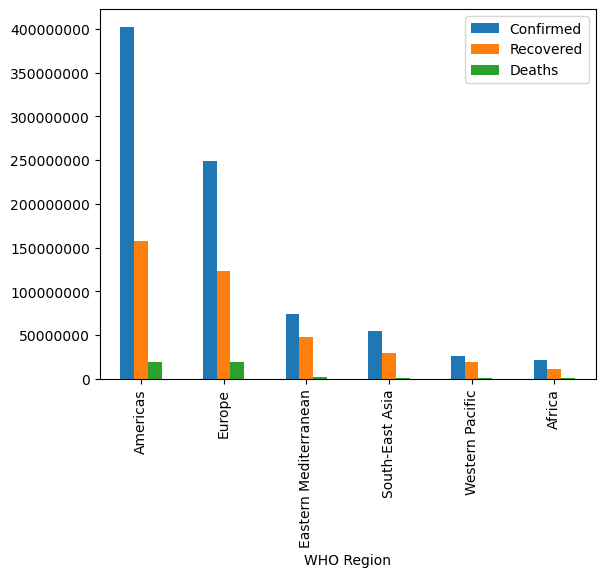

In [28]:
#graph of continent with the higest number of recorded cases 
covid_data.groupby(['WHO Region'])['Confirmed', 'Recovered', 'Deaths'].sum().sort_values(ascending = False,
                                                            by = 'Confirmed').head(10).plot.bar();
plt.ticklabel_format(style='plain', axis='y')


#### Relationship Between Variables

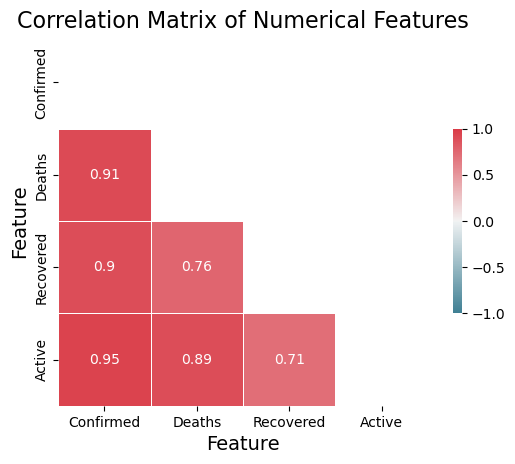

In [29]:
# Calculate the correlation matrix
corr = covid_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the color map to diverging
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add the title and x and y labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

#### Statistical Test to Check the Relationship Between Continents and Recorded Cases

To find the statistical relationship between continents and the number of COVID-19 cases, we 
can use a hypothesis test such as ANOVA (Analysis of Variance) or Kruskal-Wallis test, depending on the distribution of the data and the assumptions of the test.

If the data is normally distributed and meets the assumptions of ANOVA, we can use ANOVA to test whether there is a significant difference in the mean number of COVID-19 cases among the different continents. If the data is not normally distributed or does not meet the assumptions of ANOVA, we can use the Kruskal-Wallis test, which is a nonparametric test that does not make assumptions about the distribution of the data.

we will use the Shapiro-Wilk Test to test the null hypothesis that the data is normally distributed

In [30]:
#checking for the normality of the data 
from scipy.stats import shapiro

# Test for normality
test_stat, p_value = shapiro(covid_data['Confirmed'])

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test: test statistic = {test_stat}, p-value = {p_value}")


Shapiro-Wilk Test: test statistic = 0.10139989852905273, p-value = 0.0


Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the data is not normally distributed

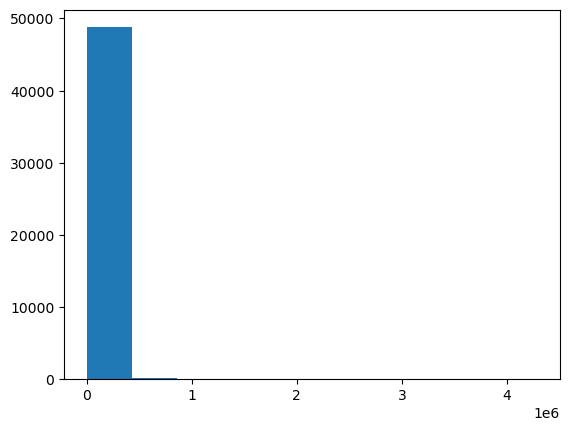

In [31]:
#we can also check the normality of the data by simple histogram

# Plot a histogram
plt.hist(covid_data['Confirmed'], bins=10)
plt.show()


Since the data is rightly skewed, one common method to normalize it is to apply a logarithmic or square root transformation. 

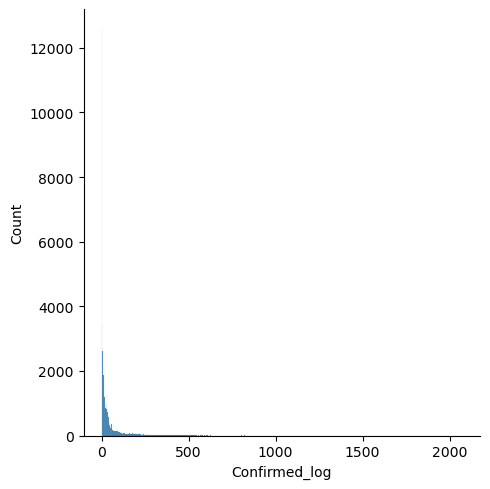

In [32]:

# Apply log transformation to 'Confirmed' column
covid_data['Confirmed_log'] = np.sqrt(covid_data['Confirmed'])

# Check the distribution of the transformed data
sns.displot(covid_data, x='Confirmed_log')



In [33]:
#renaming the 'WHO Region' column
covid_data = covid_data.rename(columns={'WHO Region': 'Continent'})

In [34]:
#grouping only the data we are interested in
grouped_data = covid_data[['Continent', 'Confirmed_log']]

In [35]:
#perfroming ANOVA Test on the data
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=grouped_data, res_var='Confirmed_log', anova_model='Confirmed_log ~ C(Continent)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Continent),5.0,2.133611e+07,4.267222e+06,305.482536,3.458460e-323
Residual,49062.0,6.853369e+08,1.396879e+04,NaN,NaN


The p-value of 3.458460e-32 (less than 0.05) obtained from the ANOVA test suggests strong evidence against the null hypothesis that there is no difference in the mean number of confirmed cases across the continents. In other words, the results indicate that there is a statistically significant relationship between the continent and the number of confirmed cases.

The extremely low p-value suggests that it is highly unlikely to observe such a large difference in the means of confirmed cases across the continents by chance alone, assuming that the null hypothesis is true. Therefore, we can reject the null hypothesis and conclude that the differences in the mean number of confirmed cases across the continents are likely due to real differences in the population means.

It is important to note that although the ANOVA test indicates the presence of a statistically significant relationship, it does not provide information about the direction or magnitude of the effect. Therefore, further analyses may be needed to fully understand the nature of the relationship between the continent and the number of confirmed cases.


Since we have rejected the null hypothesis in an ANOVA test, post-hoc tests can help determine which groups are significantly different from each other. Common post-hoc tests include Tukey's HSD.

In [36]:

# for main effect Item Type
res.tukey_hsd(df=grouped_data, res_var='Confirmed_log', xfac_var='Continent', anova_model='Confirmed_log~C(Continent)')
res.tukey_summary.sort_values('p-value')

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Eastern Mediterranean,Europe,13.694160,7.780506,19.607814,9.332675,0.001000
1,Eastern Mediterranean,Africa,52.050691,45.726148,58.375235,33.168355,0.001000
3,Eastern Mediterranean,Western Pacific,47.270888,41.074126,53.467650,30.743660,0.001000
5,Europe,Africa,38.356531,33.871644,42.841418,34.467869,0.001000
6,Europe,Americas,11.156239,6.610825,15.701654,9.891700,0.001000
7,Europe,Western Pacific,33.576728,29.273913,37.879543,31.449396,0.001000
9,Africa,Americas,49.512771,44.444305,54.581236,39.370173,0.001000
11,Africa,South-East Asia,47.065045,38.526074,55.604015,22.213633,0.001000
12,Americas,Western Pacific,44.732967,39.824877,49.641058,36.731762,0.001000
14,Western Pacific,South-East Asia,42.285242,33.840479,50.730005,20.180316,0.001000


In the context of our Tukey HSD test, a p-value less than 0.05 after the FDR adjustment suggests that the difference in the mean number of confirmed cases between the two groups is statistically significant at 0.05 level of significance, while a p-value greater than 0.05 suggests that we fail to reject the null hypothesis that there is no significant difference between the two groups.

#### Analysis on Ghana

In [37]:
ghana=covid_data.loc[covid_data['Country/Region']=='Ghana']
ghana.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Continent,Month,Confirmed_log
119,Ghana,7.9465,-1.0232,2020-01-22,0,0,0,0,Africa,January,0.0
380,Ghana,7.9465,-1.0232,2020-01-23,0,0,0,0,Africa,January,0.0
641,Ghana,7.9465,-1.0232,2020-01-24,0,0,0,0,Africa,January,0.0
902,Ghana,7.9465,-1.0232,2020-01-25,0,0,0,0,Africa,January,0.0
1163,Ghana,7.9465,-1.0232,2020-01-26,0,0,0,0,Africa,January,0.0


In [38]:
ghana.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Confirmed_log
count,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000
mean,7.946500e+00,-1.023200e+00,6631.085106,36.744681,4332.601064,2261.739362,57.153959
std,1.335825e-14,2.003738e-15,9108.539392,49.709409,7703.560948,2394.977463,58.159283
min,7.946500e+00,-1.023200e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.946500e+00,-1.023200e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.946500e+00,-1.023200e+00,1279.000000,10.000000,134.000000,1135.000000,35.763109
75%,7.946500e+00,-1.023200e+00,10240.250000,48.000000,3772.250000,4273.000000,101.193565
max,7.946500e+00,-1.023200e+00,33624.000000,168.000000,29801.000000,8585.000000,183.368481


In [39]:
#total number of confirmed cases recorded as at 2020-07-27
ghana_cases = ghana['Confirmed'].sum()
ghana_cases

1246644

In [40]:
#total number of confirmed deaths recorded as at 2020-07-27
ghana_deaths = ghana['Deaths'].sum()
ghana_deaths

6908

In [41]:
#total number of active cases as at 2020-07-27
ghana_active = ghana['Active'].sum()
ghana_active

425207

In [42]:
#percentage of deaths
ghana_death_percentage=ghana_deaths/ghana_cases*100
ghana_death_percentage

0.5541277221083164

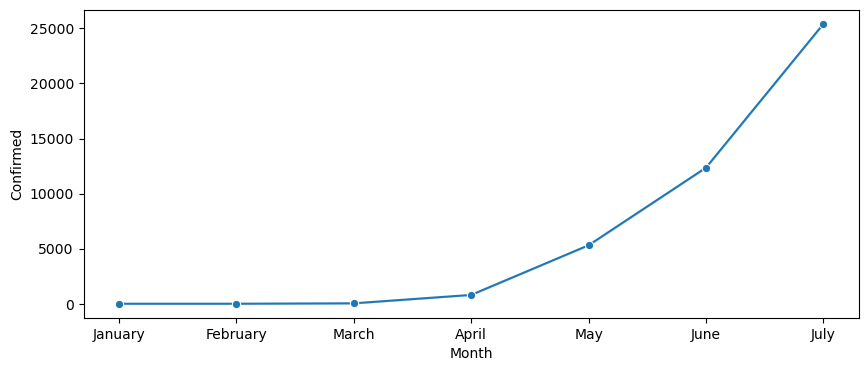

In [43]:
plt.figure(figsize = (10,4))
sns.lineplot(x = 'Month', y = 'Confirmed', data = ghana, marker = 'o', ci = False);